#            
##              Python  Assignment -1
###             Playstore data analysis
####        link for the data and problem statements : <href>https://github.com/Guru-2525</href>

In [1]:
# importing the required libraries  
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the data  
data = pd.read_csv("C:\\Users\GURU\Downloads\Python Assignment 2_BI\playstore-analysis (2) (1).csv")

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [5]:
data.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [6]:
data.shape # The raw data contains 10841 records

(10841, 13)

# 1. Data clean up – Missing value treatment

       a. Drop records where rating is missing since rating is our target/study variable

In [7]:
# Checking for the null values in all the columns
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
# Dropping the null values in the Rating column
data=data.dropna(axis=0,subset=["Rating"])

In [9]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [10]:
data.shape

(9367, 13)

In [11]:
print("After droping the null values in the Rating column we are left with {} records.".format(data.shape[0]))

After droping the null values in the Rating column we are left with 9367 records.


          b. Check the null values for the Android Ver column. 
               i. Are all 3 records having the same problem?
               ii. Drop the 3rd record i.e. record for “Life Made WIFI …”
               iii. Replace remaining missing values with the mode.

In [12]:
# i. Are all 3 records having the same problem?
Android_null=pd.isna(data["Android Ver"])
data1=data[Android_null]
data1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


                No these 3 records are not same or haiving same problem .
    * If we look at these records we can easily find out that top 2 records don't have Android ver value but the third record has and it dont have category value

In [13]:
# ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

data=data.drop(data1.index[2])

In [14]:
data["Android Ver"].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 8.0                2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [15]:
# iii. Replace remaining missing values with the mode.
data["Android Ver"].fillna(data["Android Ver"].value_counts().index[0],inplace=True)

In [16]:
data["Android Ver"].value_counts()

4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 8.0                2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [17]:
data.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


     c. Current ver – replace with most common value.

In [18]:
data["Current Ver"].value_counts()

Varies with device     1415
1.0                     458
1.1                     195
1.2                     126
1.3                     120
                       ... 
3.34.0+1702241319.a       1
3.0.5.2                   1
3.2.473.202               1
5.3.5.16                  1
0.21.1                    1
Name: Current Ver, Length: 2638, dtype: int64

In [19]:
data["Current Ver"].fillna(data["Current Ver"].value_counts().index[0],inplace=True)

In [20]:
data["Current Ver"].value_counts()

Varies with device     1419
1.0                     458
1.1                     195
1.2                     126
1.3                     120
                       ... 
3.34.0+1702241319.a       1
3.0.5.2                   1
3.2.473.202               1
5.3.5.16                  1
0.21.1                    1
Name: Current Ver, Length: 2638, dtype: int64

#  2. Data clean up – correcting the data types

            
                         a. Which all variables need to  be brought to numeric types?
                         b. Price variable – remove $ sign and convert to float
                         c. Installs – remove ‘,’ and ‘+’ sign, convert to integer
                         d. Convert all other identified columns to numeric

In [21]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [22]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


                        * Reviews should be converted to int .
                        * Price should be converted to float.
                        * Installs should be converted to int.



In [23]:
# Convertion of Reviews into int datatype
data["Reviews"]=data["Reviews"].astype(int)


Price and installs fields contains some special characters so before converting we should clean those fields.

In [24]:
# Removing $ sign in Price column. 
data["Price"]=data["Price"].str.replace("[$]","")
data["Price"]=data["Price"].astype(float)

In [25]:
# Removing [, and + ] signs in Installs column. 
data["Installs"]=data["Installs"].str.replace("[,,+]","")
data["Installs"]=data["Installs"].astype(int)

In [26]:
# converting Last Updated column to datetime datatype .
data["Last Updated"]=pd.to_datetime(data["Last Updated"])

In [27]:
data.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int32
Size                     float64
Installs                   int32
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [28]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [29]:
data.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,9.366000e+03,9366.000000,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,22705.733753,1.789744e+07,0.960928
std,0.515219,3.144042e+06,21305.040123,9.123822e+07,15.816585
min,1.000000,1.000000e+00,8.500000,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


#   3. Sanity checks – check for the following and handle accordingly

           
                             a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
                                       i. Are there any such records? Drop if so.
                             b. Reviews should not be more than installs as only those who installed can review the app.
                                       i. Are there any such records? Drop if so.

In [30]:
data.shape

(9366, 13)

In [31]:
## a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
       ##   i. Are there any such records? Drop if so.

check=data[((data.Rating>=5) & (data.Rating<=1))]
check

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


No values are greater than 5 and less than 1 are present in the Rating column .


In [32]:
# b. Reviews should not be more than installs as only those who installed can review the app.
                             #      i. Are there any such records? Drop if so.
    
check1=data[data["Reviews"]>data["Installs"]]
check1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,2018-08-02,1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,2018-07-30,Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,2017-02-08,1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,2018-07-23,1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,2017-03-11,0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,2018-07-23,1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,2017-03-03,1.0,2.3 and up


    We found some records where Reviews are greater than Installs .
    and in the below code we are deleting those values by using their index.

In [33]:
data=data.drop(check1.index)

In [34]:
data.shape

(9359, 13)

# 4. Identify and handle outliers – 

     a. Price column
             i. Make suitable plot to identify outliers in price
             ii. Do you expect apps on the play store to cost $200? Check out these cases
         iii. After dropping the useless records, make the suitable plot again to identify outliers
         iv. Limit data to records with price < $30
     b. Reviews column
             i. Make suitable plot
             ii. Limit data to apps with < 1 Million reviews
     c. Installs
             i. What is the 95th percentile of the installs?
             ii. Drop records having a value more than the 95th percentile

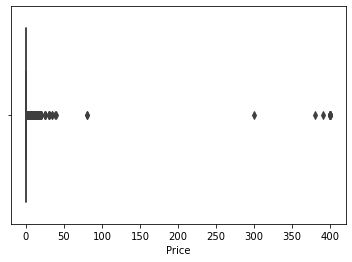

In [35]:
# boxplot plot to check the outliers in Price column.
sns.boxplot(x=data["Price"])
plt.show()

I dont think  there are some apps that costs $200.so iam considering those as outliers and removing 

In [36]:
# Removing those records where Price is greater than $200.  
data=data[data.Price<200]
data.shape

(9344, 13)

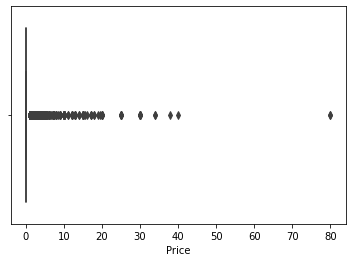

In [37]:
sns.boxplot(x=data["Price"])
plt.show()

In [38]:
#iv. Limit data to records with price < $30
data=data[data.Price<30]
data.shape

(9338, 13)

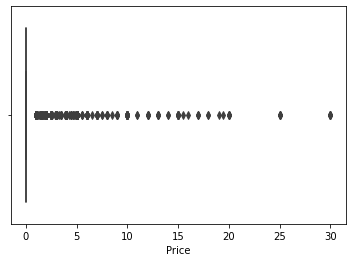

In [39]:
sns.boxplot(x=data["Price"])
plt.show()

       b. Reviews column
                   i. Make suitable plot
                   ii. Limit data to apps with < 1 Million reviews

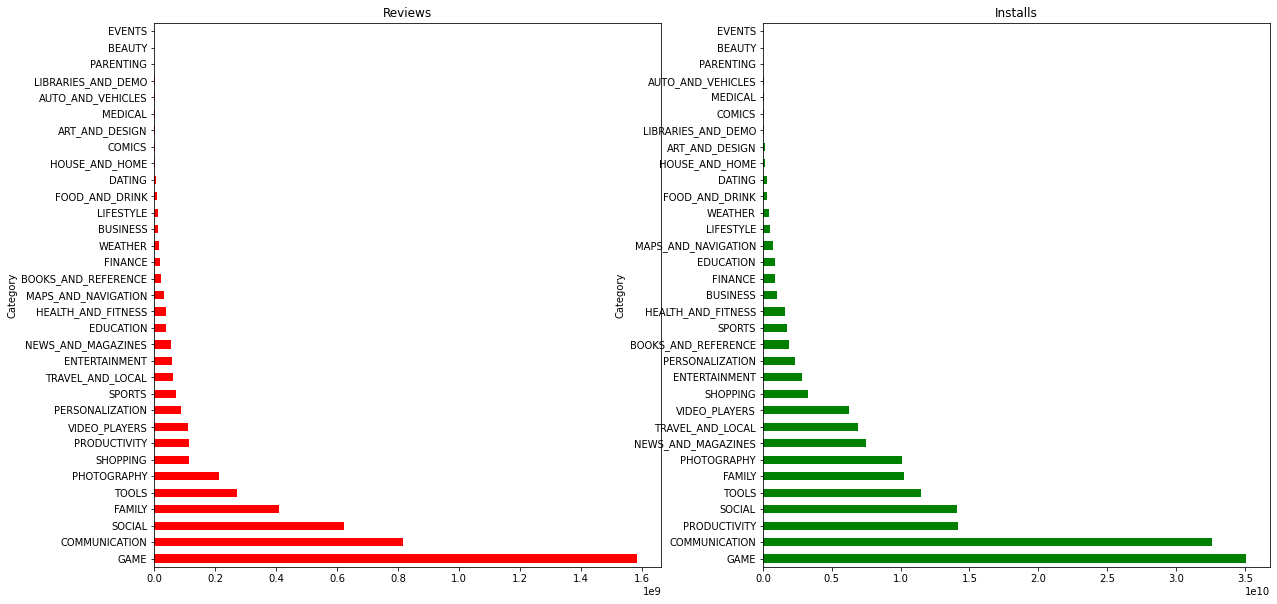

In [40]:
tot_reviews=data.groupby("Category")["Reviews"].sum().sort_values(ascending=False)
tot_installs=data.groupby("Category")["Installs"].sum().sort_values(ascending=False)
fig,ax=plt.subplots(1,2,figsize=(20,10))
tot_reviews.plot(kind="barh",fontsize=10,ax=ax[0],title="Reviews",color="red")
tot_installs.plot(kind="barh",ax=ax[1],title="Installs",color="green")
plt.show()

<AxesSubplot:>

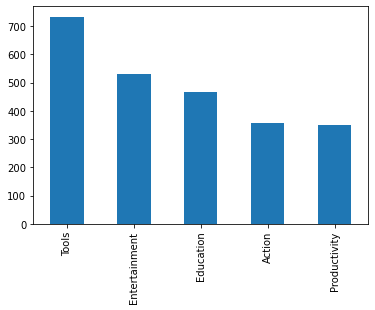

In [41]:
data["Genres"].value_counts().head(5).plot(kind="bar")

In [42]:
data=data[data["Reviews"]<1000000]
data.shape

(8634, 13)

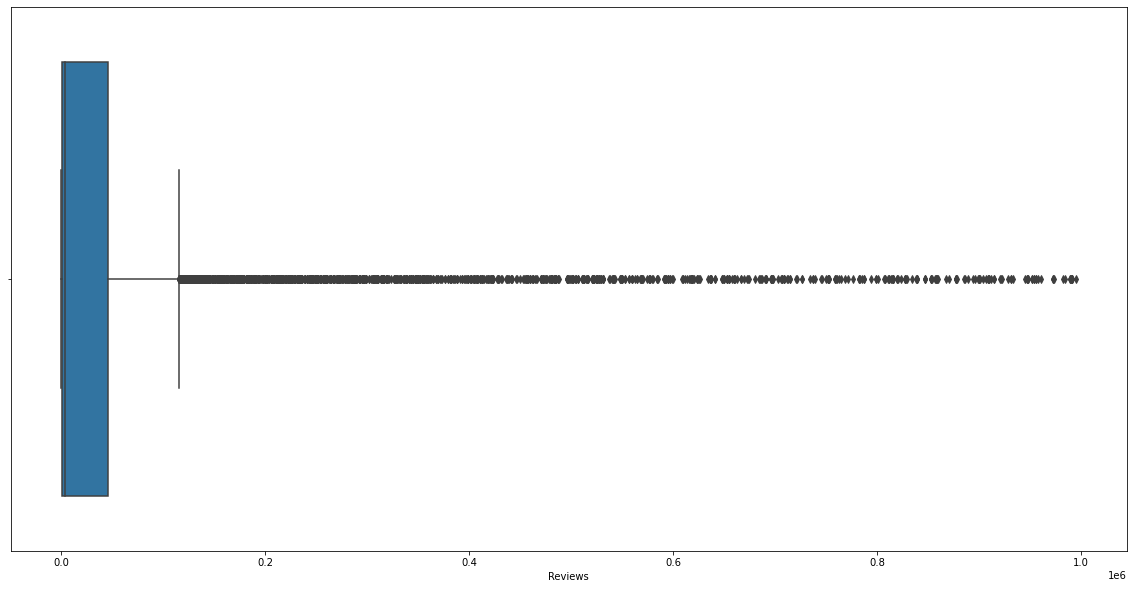

In [43]:
fig,ax=plt.subplots(figsize=(20,10))
sns.boxplot(x=data["Reviews"])
plt.show()

       c. Installs
             i. What is the 95th percentile of the installs?
             ii. Drop records having a value more than the 95th percentile

In [44]:
_95Per=np.percentile(data["Installs"],95)
_95Per

10000000.0

In [45]:
data=data[data["Installs"]<_95Per]    
data.shape

(7258, 13)

# Data analysis to answer business questions

          5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
                        a. How do you explain this?
                        b. What is the implication of this on your analysis?

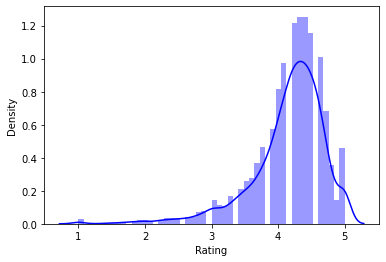

In [46]:
sns.distplot(data["Rating"],color="blue")
plt.show()

The above plot has long tail towards left size so we can say that the data is more skewed towards lesser or lower values.

b. What is the implication of this on your analysis?

Because the data in the Rating column is skewed if we make any predictions on this data we dont get the correct results .so we should do some mathematical or statistical operations to make this data normally distributed.

        6. What are the top Content Rating values?
                a. Are there any values with very few records?
                b. If yes, drop those as they won’t help in the analysis

Everyone           5913
Teen                746
Mature 17+          346
Everyone 10+        249
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64


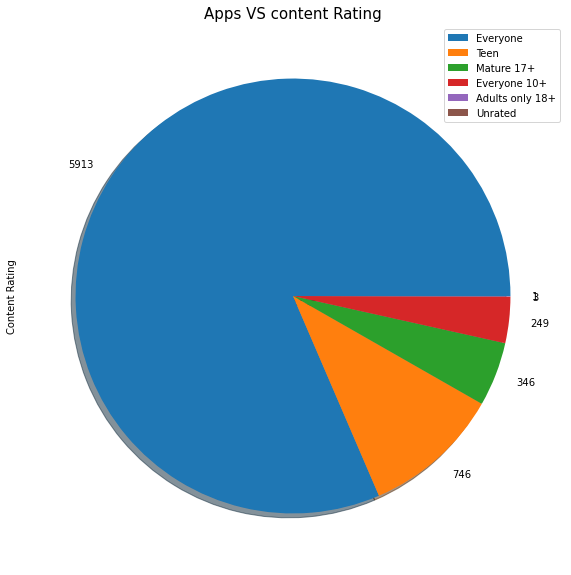

In [47]:
content_rat=data["Content Rating"].value_counts()
print(content_rat)
fig,ax=plt.subplots(figsize=(15,10))
content_rat.plot(kind="pie",shadow=True,labels=content_rat)
plt.title("Apps VS content Rating",fontsize=15)
plt.legend(content_rat.index)
plt.show()

We can notice that there are only few records with Adults only 18+ and Unrated so we are removing them.

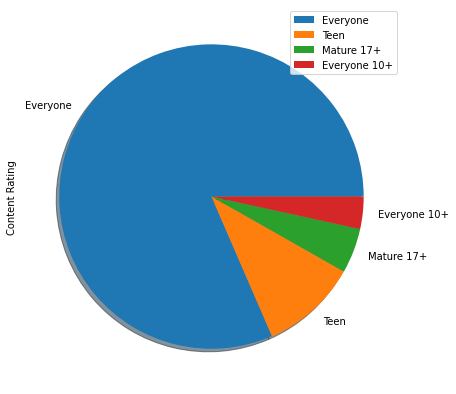

In [48]:
data=data[data["Content Rating"]!="Adults only 18+"]
data=data[data["Content Rating"]!="Unrated"]
data["Content Rating"].value_counts().plot(kind="pie",shadow=True,figsize=(10,7))
plt.legend(content_rat.index)
plt.show()

        7. Effect of size on rating
                        a. Make a joinplot to understand the effect of size on rating
                        b. Do you see any patterns?
                        c. How do you explain the pattern?

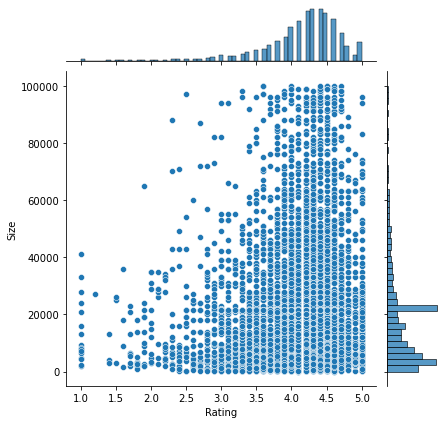

In [49]:
sns.jointplot(x=data["Rating"],y=data["Size"])
plt.show()

       By seeing the above joinplot we can say that :
                        * If the size is above 60k KB then most of the apps will get Rating 4 and above .
                        * More apps of small size got good rating .
    

              8. Effect of price on rating
                            a. Make a jointplot (with regression line)
                            b. What pattern do you see?
                            c. How do you explain the pattern?
                            d. Replot the data, this time with only records with price > 0 
                            e. Does the pattern change?
                            f. What is your overall inference on the effect of price on the rating

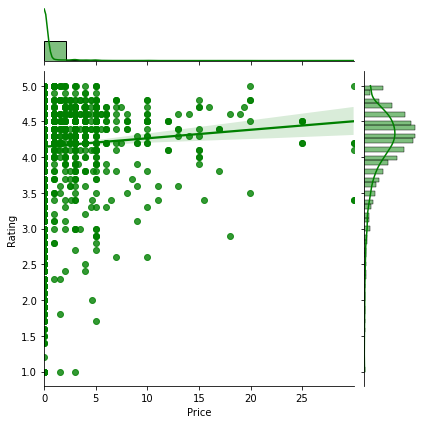

In [50]:
sns.jointplot(x="Price",y="Rating",data=data,kind="reg",color="green")

        Most of the apps whose price is in between $0-$5 got very good rating.

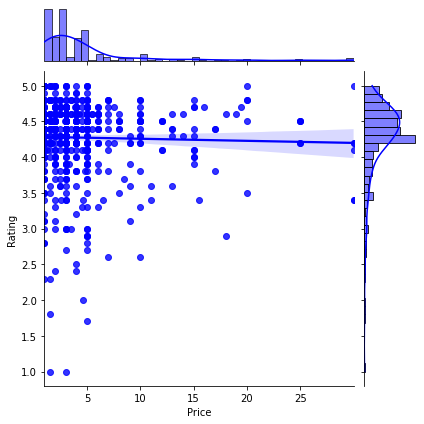

In [51]:
data1=data[data["Price"]>0]
sns.jointplot(x="Price",y="Rating",data=data1,kind="reg",color="blue")

                  9. Look at all the numeric interactions together – 
                            a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

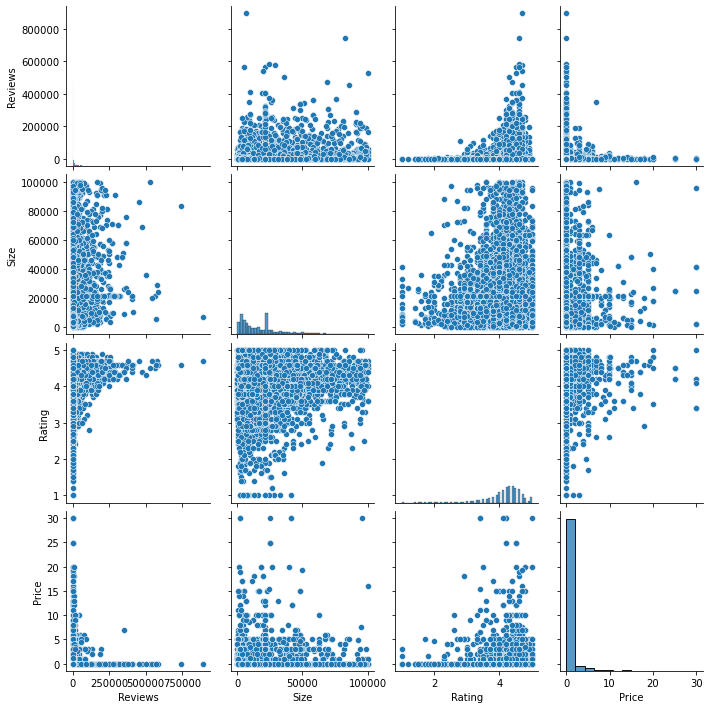

In [52]:
sns.pairplot(data,vars=["Reviews","Size","Rating","Price"])
plt.show()

      10. Rating vs. content rating
                    a. Make a bar plot displaying the rating for each content rating
                    b. Which metric would you use? Mean? Median? Some other quantile?
                    c. Choose the right metric and plot

In [53]:
data.describe()

,Rating,Reviews,Size,Installs,Price
count,7254.000000,7254.000000,7254.000000,7.254000e+03,7254.000000
mean,4.149904,19232.415495,20393.560956,7.933793e+05,0.386588
std,0.561934,47774.196928,20312.284057,1.483246e+06,1.882558
min,1.000000,1.000000,8.500000,5.000000e+00,0.000000
25%,3.900000,84.250000,5300.000000,1.000000e+04,0.000000
50%,4.300000,1381.500000,15000.000000,1.000000e+05,0.000000
75%,4.500000,16386.250000,26000.000000,1.000000e+06,0.000000
max,5.000000,896118.000000,100000.000000,5.000000e+06,29.990000


                  Rating
Content Rating          
Everyone        4.147590
Everyone 10+    4.192369
Mature 17+      4.079480
Teen            4.186729


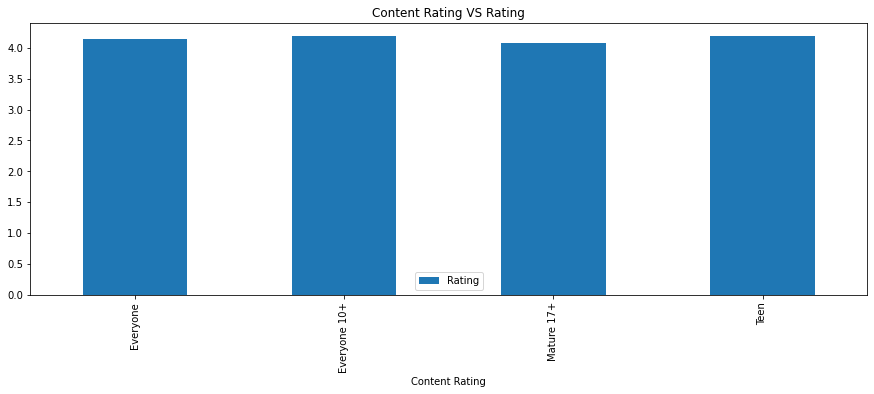

In [54]:
cr_r=pd.DataFrame(data.groupby("Content Rating")["Rating"].mean())
print(cr_r)
cr_r.plot(kind="bar",figsize=(15,5))
plt.title("Content Rating VS Rating")
plt.show()

In [55]:
data.describe()

,Rating,Reviews,Size,Installs,Price
count,7254.000000,7254.000000,7254.000000,7.254000e+03,7254.000000
mean,4.149904,19232.415495,20393.560956,7.933793e+05,0.386588
std,0.561934,47774.196928,20312.284057,1.483246e+06,1.882558
min,1.000000,1.000000,8.500000,5.000000e+00,0.000000
25%,3.900000,84.250000,5300.000000,1.000000e+04,0.000000
50%,4.300000,1381.500000,15000.000000,1.000000e+05,0.000000
75%,4.500000,16386.250000,26000.000000,1.000000e+06,0.000000
max,5.000000,896118.000000,100000.000000,5.000000e+06,29.990000


                  11. Content rating vs. size vs. rating – 3 variables at a time
                            a. Create 5 buckets (20% records in each) based on Size
                            b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination
                            c. Make a heatmap of this
                                    i. Annotated
                                    ii. Greens color map
                            d. What’s your inference? Are lighter apps preferred in all categories?Heavier? Some

In [56]:
data["Size_bucket"]=pd.cut(data["Size"],[0,20000,40000,60000,80000,100000]\
                    ,labels=["low","medium","high","very high","huge"])

In [57]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,low
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,low
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,low
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,low
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up,low


In [58]:
bucket_data=pd.pivot_table(data,values="Rating",index="Size_bucket",columns="Content Rating")
bucket_data

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_bucket,,,,
low,4.136404,4.214865,3.990058,4.175758
medium,4.163083,4.140952,4.144348,4.159292
high,4.144717,4.232432,4.177143,4.232184
very high,4.206081,4.289474,4.228571,4.244231
huge,4.213821,4.221429,4.290909,4.243137


In [59]:
per_20=[0.2,0.4,0.6,0.8,1]
per_20


[0.2, 0.4, 0.6, 0.8, 1]

In [60]:
print("Size")
print(data.Size.quantile(per_20),"\n\n")
print("Rating")
print(data.Rating.quantile(per_20))

Size
0.2      4100.000000
0.4      9800.000000
0.6     21516.529524
0.8     31000.000000
1.0    100000.000000
Name: Size, dtype: float64 


Rating
0.2    3.8
0.4    4.2
0.6    4.4
0.8    4.6
1.0    5.0
Name: Rating, dtype: float64


In [61]:
bucket_data=pd.pivot_table(data,values="Rating",index="Size_bucket",columns="Content Rating",\
                           aggfunc=lambda x:np.quantile(x,0.2))
bucket_data

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_bucket,,,,
low,3.8,4.00,3.50,3.8
medium,3.8,3.90,3.90,3.9
high,3.8,4.00,4.10,4.0
very high,3.9,4.16,3.96,3.9
huge,3.9,3.92,4.00,4.0


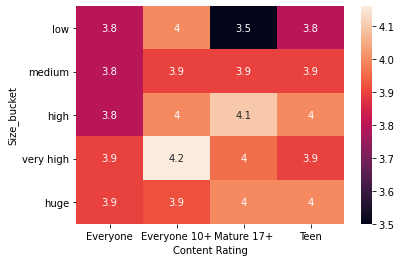

In [62]:
sns.heatmap(bucket_data,annot=True)
plt.show()

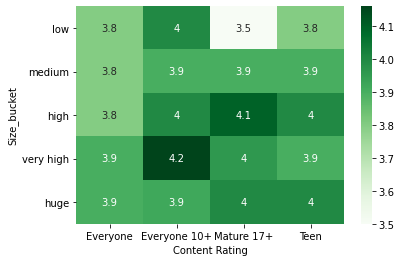

In [63]:
sns.heatmap(bucket_data,annot=True,cmap="Greens")
plt.show()

     * Most if thr games got reviewed in Game Communication Productivity.
     * Even though there are more games in Everyone Content rating their avg rating is not above 4 but in Everyone10+ rating 
               is good above 4 .
     * If the size of the app is huge then the app will definetely get good rating(above 3.5).
     
     Based on all these information we can conclude that :
                            1. Game ,Communication,Productivity are the most prefered categories of the apps.
                            2. If the apps content rating is Everyone10+ and its size is huge that app is most preferable.
                            3. The most prefered genres are Tools,Entertainment,Education.

### If any new app has the above mentioned features then that app needs  boost in visibility of search results .

   ##### Done by
   #### M.GuruPrasad Reddy

   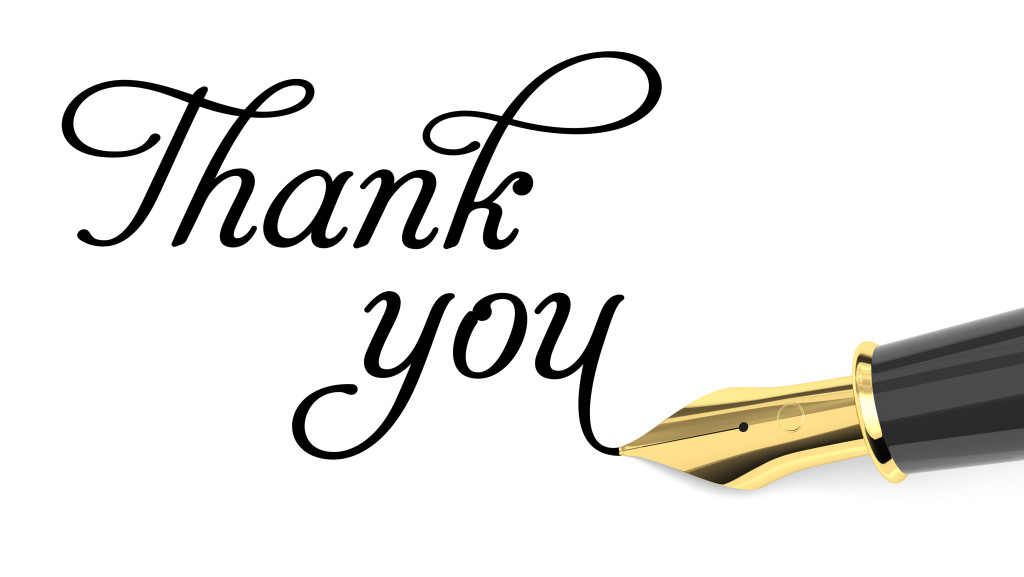